In [38]:
import pandas as pd
import numpy as np
from numpy.random import randint as ri
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle


import warnings
warnings.filterwarnings('ignore')

In [39]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df =df.sample(frac =1)
df.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
125,Djibouti,Sub-Saharan Africa,126,4.369,0.08096,0.44025,0.59207,0.36291,0.46074,0.28105,0.18093,2.05125
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570
65,North Cyprus,Western Europe,66,5.695,0.05635,1.20806,1.07008,0.92356,0.49027,0.14280,0.26169,1.59888
28,France,Western Europe,29,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
136,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
22,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
42,Guatemala,Latin America and Caribbean,43,6.123,0.05224,0.74553,1.04356,0.64425,0.57733,0.09472,0.27489,2.74255
35,Spain,Western Europe,36,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367
86,Serbia,Central and Eastern Europe,87,5.123,0.04864,0.92053,1.00964,0.74836,0.20107,0.02617,0.19231,2.02500
142,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895


#### As the 'Target' contains continious data, this is a regression problem

In [40]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From the above statistics, it seems dataset is having no null values

In [41]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null value present

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 125 to 12
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 16.0+

#### As 'Country' and 'Region' do not contribute to Happness Score. Dropping both columns. Al

In [43]:
df1 =df.drop(columns =['Country', 'Region', 'Happiness Rank'])
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
125,4.369,0.08096,0.44025,0.59207,0.36291,0.46074,0.28105,0.18093,2.05125
17,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570
65,5.695,0.05635,1.20806,1.07008,0.92356,0.49027,0.14280,0.26169,1.59888
28,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
136,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
...,...,...,...,...,...,...,...,...,...
45,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
50,5.890,0.05642,0.68133,0.97841,0.53920,0.57414,0.08800,0.20536,2.82334
130,4.292,0.06130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791
37,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323


In [44]:
for i in df1:
    print(df1[i].value_counts())

Happiness Score
5.192    2
4.369    1
4.565    1
3.678    1
5.548    1
        ..
4.739    1
5.770    1
5.791    1
4.350    1
7.200    1
Name: count, Length: 157, dtype: int64
Standard Error
0.04394    2
0.04934    2
0.05051    2
0.03751    2
0.03780    2
          ..
0.04330    1
0.04263    1
0.04763    1
0.04734    1
0.03868    1
Name: count, Length: 153, dtype: int64
Economy (GDP per Capita)
0.44025    1
0.22208    1
0.06940    1
0.07850    1
0.95847    1
          ..
0.88113    1
1.12486    1
1.12555    1
0.76821    1
1.33723    1
Name: count, Length: 158, dtype: int64
Family
0.59207    1
0.77370    1
0.77265    1
0.00000    1
1.22668    1
          ..
0.60429    1
1.07023    1
1.27948    1
0.77711    1
1.29704    1
Name: count, Length: 158, dtype: int64
Health (Life Expectancy)
0.92356    2
0.36291    1
0.51529    1
0.06699    1
0.53886    1
          ..
0.73793    1
0.72394    1
0.77903    1
0.72990    1
0.89042    1
Name: count, Length: 157, dtype: int64
Freedom
0.46074    1
0.5

In [45]:
# Plotting scatter plot to find relationship between feature and label

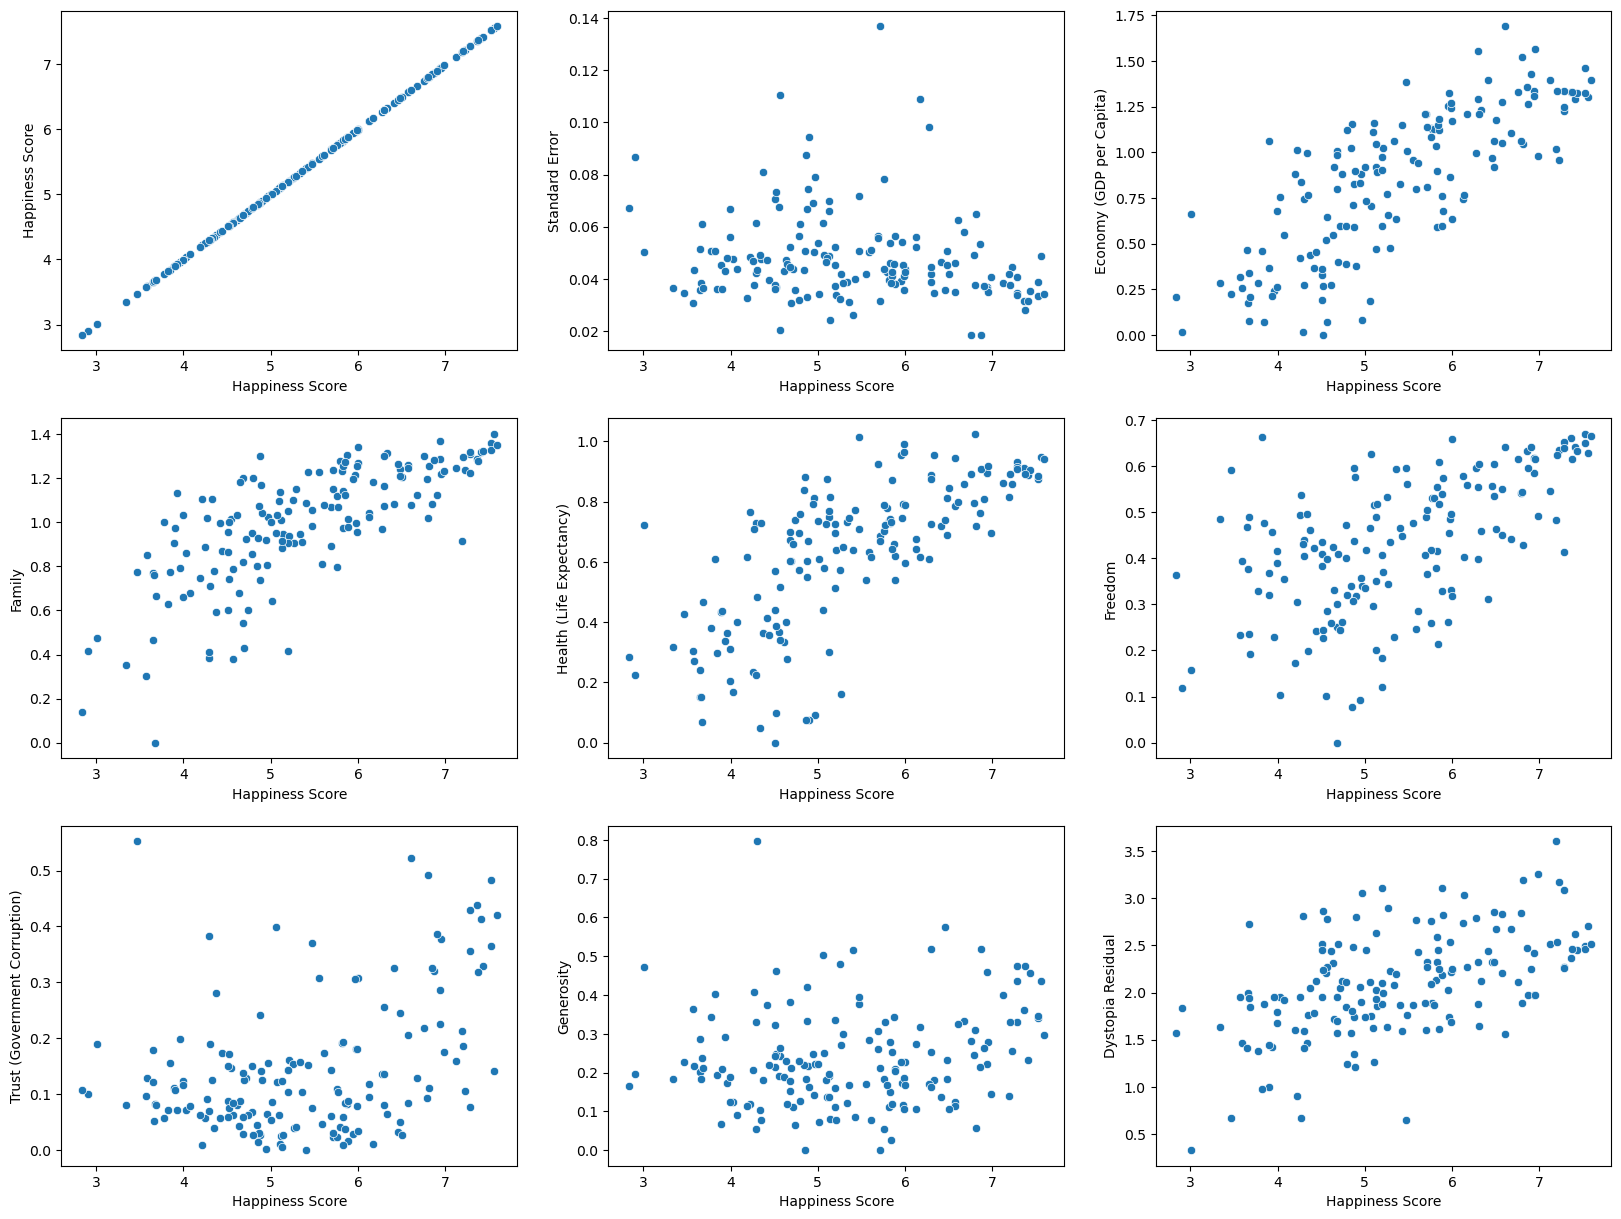

In [46]:
plt.figure(figsize=(20,15))
plotnumber =1

for column in df1:
    if plotnumber <=9:
        plt.subplot(3,3, plotnumber)
        sns.scatterplot(x ='Happiness Score', y =column, data =df1)
        plt.xlabel('Happiness Score')
        plt.ylabel(column)
    plotnumber+=1
plt.show()

We will further check the relation ship between feature and label

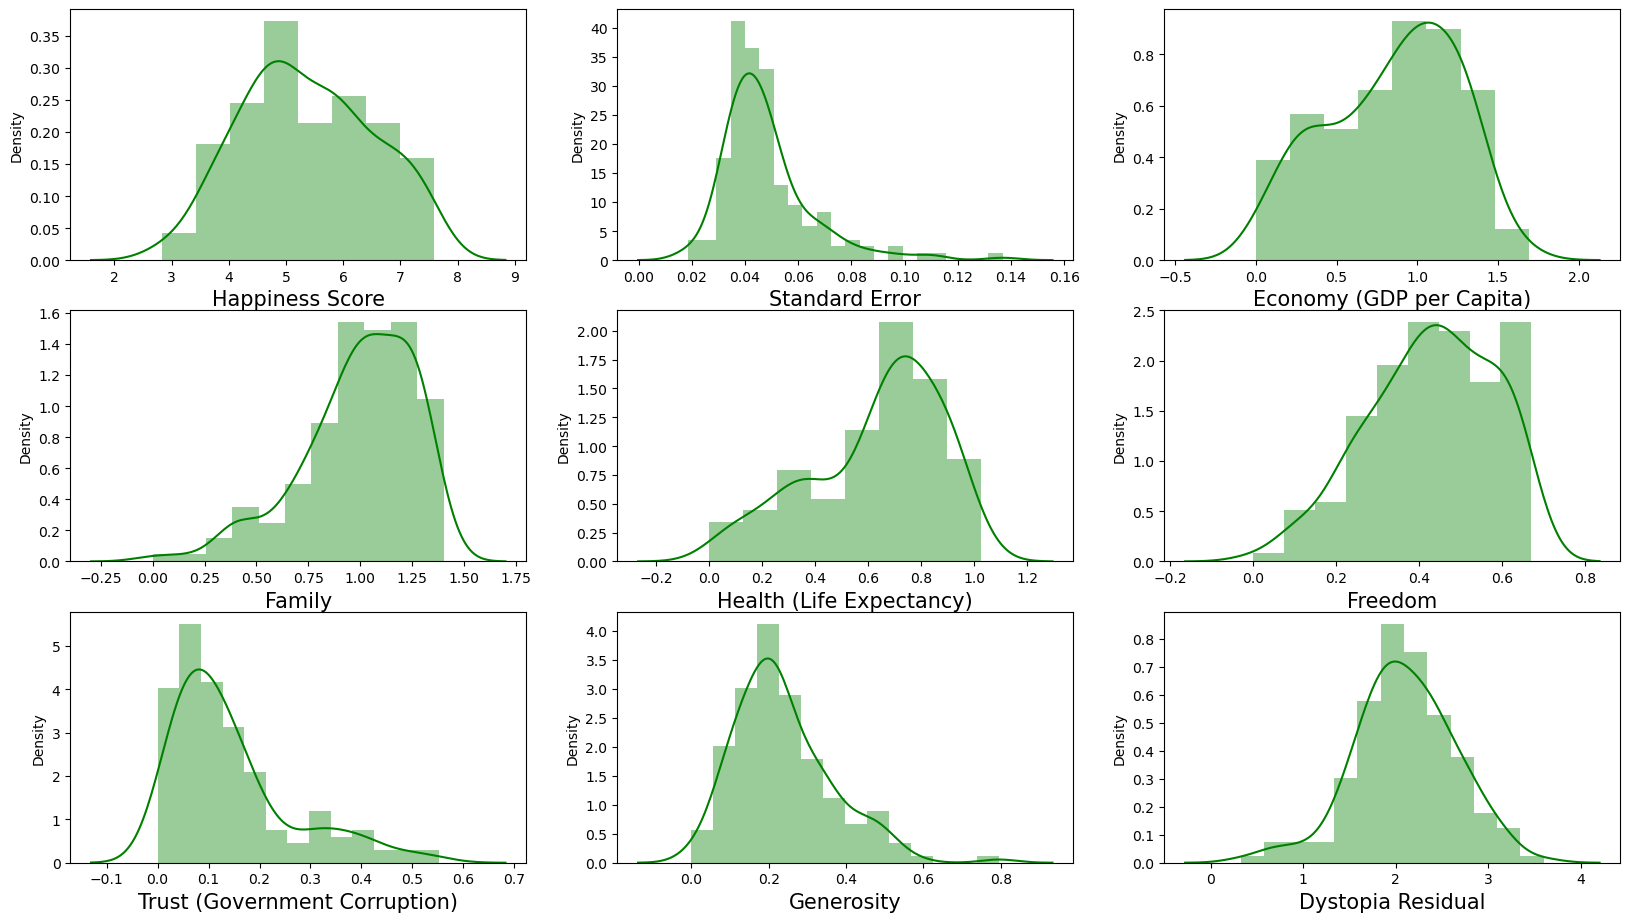

In [47]:
# Let's visualize the columns
plt.figure(figsize =(20,15))
plotnumber =1

for i in df1:
    if plotnumber <=10:
        plt.subplot(4,3, plotnumber)
        sns.distplot(df1[i], color='g')
        plt.xlabel(i, fontsize =15)
        
    plotnumber+=1
plt.show()

## Checking outliers

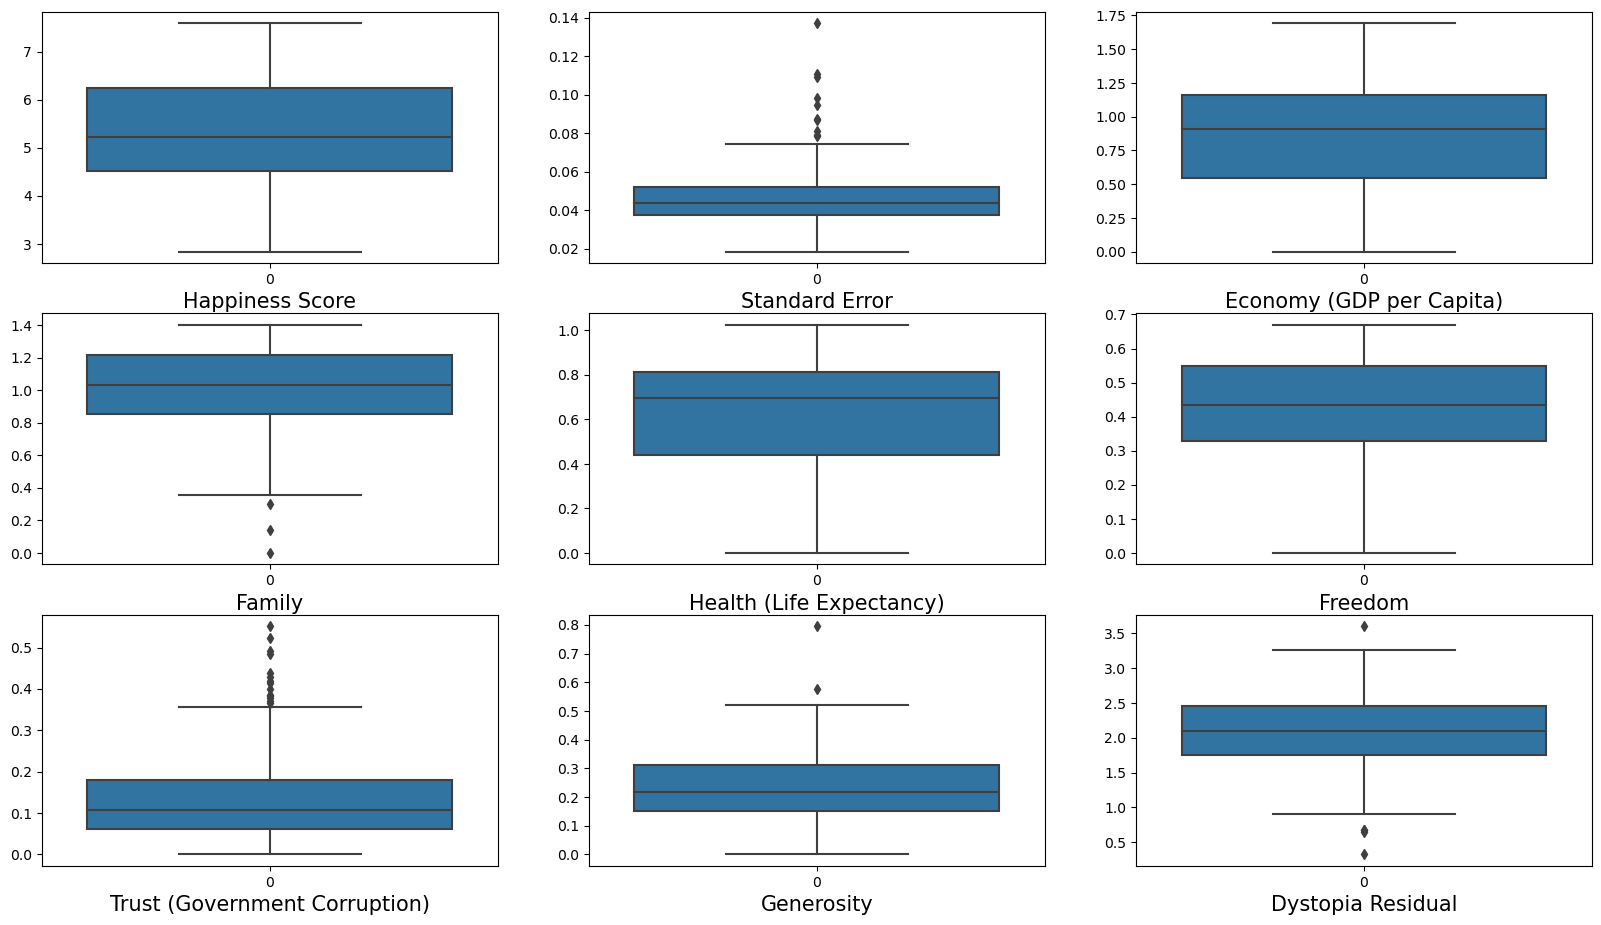

In [48]:
plt.figure(figsize =(20,15))
plotnumber =1

for i in df1:
    if plotnumber <=10:
        plt.subplot(4,3, plotnumber)
        sns.boxplot(df1[i])
        plt.xlabel(i, fontsize =15)
        
    plotnumber+=1
plt.show()

Standard Error, Familty, Trust (Government Corruption), Generosity and Dystopia Residual have outliers. Lets remove them

In [49]:
# outllier removal using IQR
# copy dataframe to temp dataframe

temp_df_iqr =df1[['Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

In [50]:
# Finding IQR to indentify outliers
Q1 =temp_df_iqr.quantile(0.25)
Q3 =temp_df_iqr.quantile(0.75)

#IQR
IQR =Q3 - Q1

In [51]:
# Deleting high outliers
for i in temp_df_iqr:
    high_iqr =Q3[i] + (1.5 * IQR[i])
    high_index = np.where(temp_df_iqr[i] > high_iqr)
    temp_df_iqr =temp_df_iqr.drop(temp_df_iqr.index[high_index])

In [52]:
# Deleting outliers on lower side
for i in temp_df_iqr:
    low_iqr =Q1[i] - (1.5 * IQR[i])
    low_index =np.where(temp_df_iqr[i] < low_iqr)
    temp_df_iqr =temp_df_iqr.drop(temp_df_iqr.index[low_index])

In [53]:
temp_df_iqr

,Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual
17,0.03676,1.36948,0.28703,0.45901,1.97570
65,0.05635,1.07008,0.14280,0.26169,1.59888
28,0.03512,1.26038,0.20646,0.12332,2.21126
136,0.04758,0.86040,0.07122,0.12344,1.94939
22,0.06476,1.25596,0.11069,0.05841,3.19131
...,...,...,...,...,...
45,0.03581,1.25712,0.18060,0.10705,1.68435
50,0.05642,0.97841,0.08800,0.20536,2.82334
130,0.06130,0.41134,0.06977,0.33128,2.80791
37,0.03868,1.07617,0.08129,0.25376,2.32323


In [54]:
# Outlier removal using zscore
df_zscore =df1[['Standard Error', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z<3).all(axis =1)]
df_zscore.shape

(151, 4)

In [55]:
# Checking Data loss after removing by IQR and zscore method


print("Shape of old dataset: ", df1.shape[0])
print('\n')
print("Shape of new Dataset (after using IQR method): ", temp_df_iqr.shape[0])
print("Data Loss using IQR method: ", ((df1.shape[0] - temp_df_iqr.shape[0])/df1.shape[0])*100)
print('\nShape of new Dataset (after using zscore:) ', df_zscore.shape[0])
print("Data loss using zscore method: ", ((df1.shape[0] - df_zscore.shape[0])/df1.shape[0])*100)

Shape of old dataset:  158


Shape of new Dataset (after using IQR method):  126
Data Loss using IQR method:  20.253164556962027

Shape of new Dataset (after using zscore:)  151
Data loss using zscore method:  4.430379746835443


We will use zscore method to remove outliers as there is less data loss

In [56]:
# Removing outliers using zscore
z =np.abs(zscore(df1))
df1 =df1[(z<3).all(axis =1)]
df1.shape

(149, 9)

In [57]:
# Let's check skewness
df1.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [58]:
# Removing skewness
df1['Standard Error'] =np.cbrt(df1['Standard Error'])
df1['Trust (Government Corruption)'] =np.cbrt(df1['Trust (Government Corruption)'])

In [59]:
# Checking Skewness againg
df1.skew()

Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

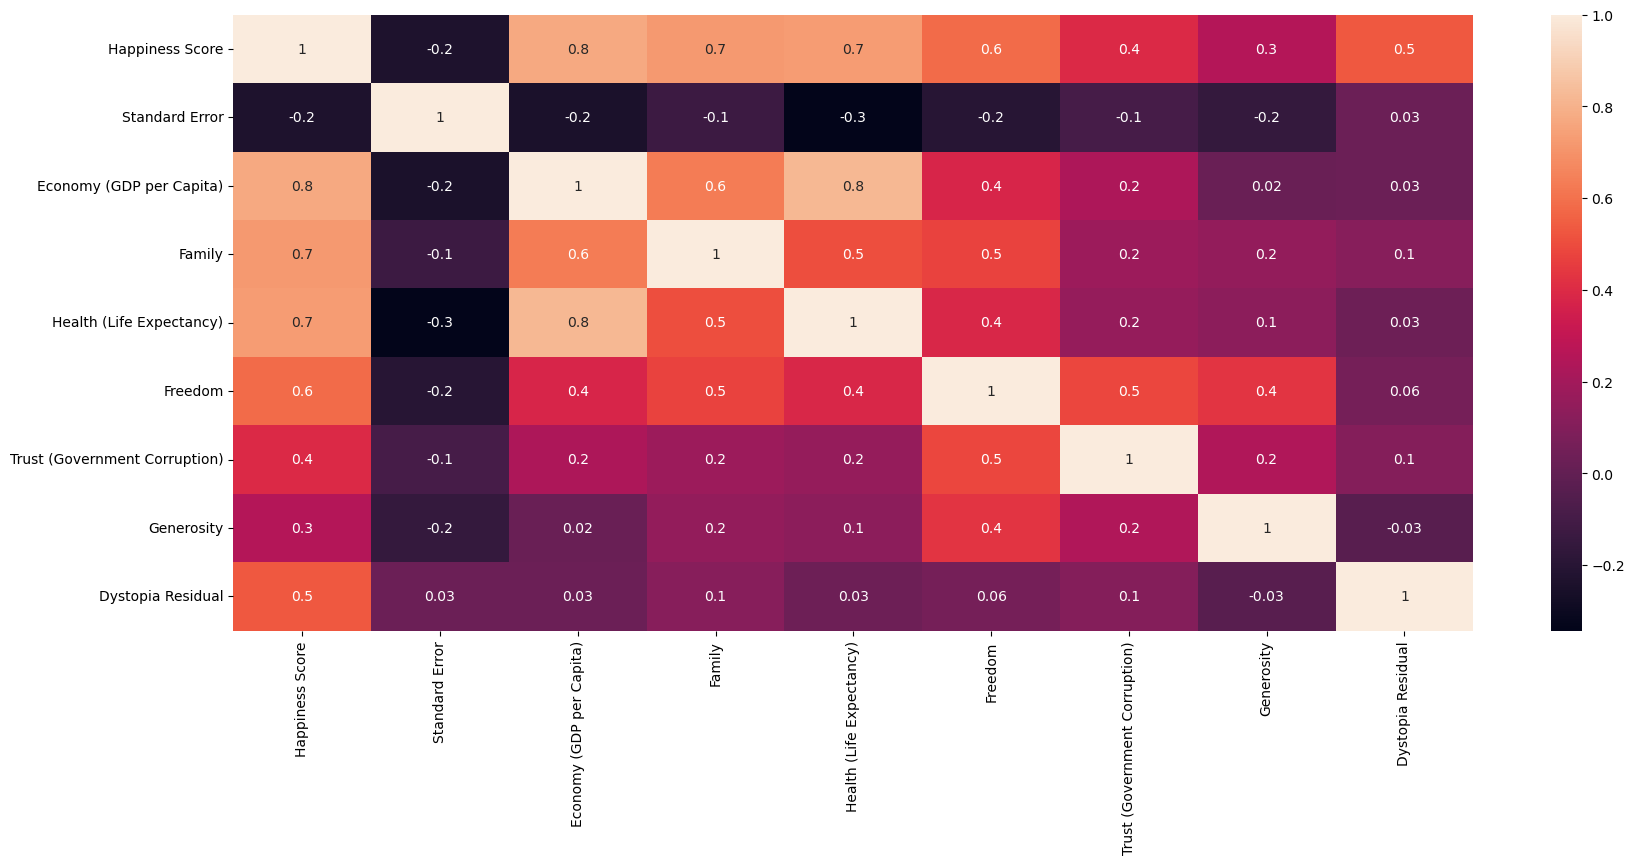

In [60]:
#Generating HeatMap
plt.figure(figsize =(20,8))
sns.heatmap(df1.corr(), annot =True, fmt ='.1g')
plt.show()

In [61]:
# Seperating Features and Label
x =df1.drop(columns =['Happiness Score'])
y =df1['Happiness Score']

In [62]:
# Data Standardization using Standard Scaler
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2.243082,-1.091142,-1.659284,-1.124858,0.221415,1.225243,-0.423201,-0.132877
1,-0.672554,1.225323,1.437426,1.047311,1.265794,1.257807,1.903949,-0.277087
2,0.809431,0.894551,0.244806,1.162484,0.417814,0.291076,0.252650,-0.996365
3,-0.818771,1.074859,1.002841,1.253178,0.815799,0.773507,-0.905319,0.172552
4,0.197180,-0.269953,-0.590427,-1.924826,-2.152265,-0.472535,-0.904314,-0.327308
...,...,...,...,...,...,...,...,...
144,-0.756709,1.056652,0.989855,1.438074,0.456921,0.591496,-1.041476,-0.833219
145,0.814053,-0.467667,-0.120350,-0.405630,0.975619,-0.258747,-0.218756,1.340896
146,1.127267,-2.188225,-2.379199,-1.684974,0.020560,-0.492528,0.835023,1.311443
147,-0.506798,1.108997,0.269065,0.965592,-0.199848,-0.340666,0.186286,0.386281


In [63]:
# Finding variance inflation factor in each scaled features
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

,VIF Values,Features
0,1.161693,Standard Error
1,4.105092,Economy (GDP per Capita)
2,1.946484,Family
3,3.417996,Health (Life Expectancy)
4,1.930776,Freedom
5,1.380158,Trust (Government Corruption)
6,1.319227,Generosity
7,1.039449,Dystopia Residual


### Model Building

In [64]:
# Finding best random State

maxrs =0
maxacc =0
for i in range(1,200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =.30, random_state =i)
    lr =LinearRegression()
    lr.fit(x_train, y_train)
    pred =lr.predict(x_test)
    acc =r2_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
print("Max accuracy is :", maxacc, "at random state :", maxrs)


Max accuracy is : 0.9995334087397874 at random state : 118


In [65]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =.3, random_state =maxrs)

In [66]:
# Initializing Models
LR =LinearRegression()
KNN =KNeighborsRegressor()
RFR = RandomForestRegressor()
GBR =GradientBoostingRegressor()
lasso =Lasso()
ridge =Ridge()
DTR =DecisionTreeRegressor()
ETR =ExtraTreesRegressor()
svr =SVR()

In [67]:
models ={'LinearRegression': LR,
        'KneighborsRegressor': KNN,
        'RandomForestRegressor': RFR,
        'GradientBoostingRegressor': GBR,
        'Lasso': lasso,
        'Ridge': ridge,
        'DecisionTreeRegressor': DTR,
        'ExtraTreesRegressor': ETR,
        'SVR': svr}

for name, model in models.items():
    model.fit(x_train, y_train)
    test_pred =model.predict(x_test)
    train_pred =model.predict(x_train)
    
    print(name)
    print("x"*20)
    print("R2 Score on Training Data :", (r2_score(y_train, train_pred))*100)
    print("R 2 Score on Test Data :", (r2_score(y_test, test_pred))*100)
    print("Mean Absolute Error :", (mean_absolute_error(y_test, test_pred))*100)
    print("Mean Squared Error :", mean_squared_error(y_test, test_pred))
    print("Root Mean Squared Error :", np.sqrt(mean_absolute_error(y_test, test_pred)))
    print('\n')
    
    #Cross Validation
    score =cross_val_score(model, x, y, cv =5)
    print("Cross Validation")
    print("x"*20)
    print(score)
    print(score.mean())
    print("Difference between R2 Score and Cross Validation Score is :",(r2_score(y_test, test_pred) - score.mean())*100)
    print("="*80)
    print('\n')

LinearRegression
xxxxxxxxxxxxxxxxxxxx
R2 Score on Training Data : 99.86036192817899
R 2 Score on Test Data : 99.95334087397873
Mean Absolute Error : 2.0964289722781753
Mean Squared Error : 0.000701891096786819
Root Mean Squared Error : 0.14479050287495293


Cross Validation
xxxxxxxxxxxxxxxxxxxx
[0.99879103 0.99746737 0.99946593 0.99877032 0.9987917 ]
0.998657268531632
Difference between R2 Score and Cross Validation Score is : 0.0876140208155407


KneighborsRegressor
xxxxxxxxxxxxxxxxxxxx
R2 Score on Training Data : 93.66156525959603
R 2 Score on Test Data : 89.46121120948848
Mean Absolute Error : 29.472888888888892
Mean Squared Error : 0.1585345173333334
Root Mean Squared Error : 0.5428893891842876


Cross Validation
xxxxxxxxxxxxxxxxxxxx
[0.90072607 0.89350677 0.86860429 0.93759676 0.90997471]
0.9020817210898666
Difference between R2 Score and Cross Validation Score is : -0.7469608994981836


RandomForestRegressor
xxxxxxxxxxxxxxxxxxxx
R2 Score on Training Data : 98.44577406140237
R 2 S

#### Based on the model performance, we will chose Ridge as our model.

#### Hyperparameter tunning is not required as our model is already giving accuracy of 99.95%

In [68]:
Final_model =Ridge()
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)

print("Accuracy is :", acc*100)

Accuracy is : 99.94245968454958


In [69]:
# Saving Model
pickle.dump(Final_model, open("Happiness Score.pkl", 'wb'))

In [70]:
# Loading Model
loaded_model =pickle.load(open('Happiness Score.pkl', 'rb'))
pred =loaded_model.predict(x_test)
result =loaded_model.score(x_test, y_test)
print(result*100)

99.94245968454958


In [71]:
# Comparing Actual Vs predicted
test =np.array(y_test)
df3 =pd.DataFrame()
df3['Predicted'] =pred
df3['Actual'] =test
df3['Difference'] =pred-test
df3

,Predicted,Actual,Difference
0,5.723887,5.689,0.034887
1,7.250871,7.284,-0.033129
2,7.509499,7.587,-0.077501
3,4.453307,4.436,0.017307
4,7.311451,7.278,0.033451
5,5.466332,5.429,0.037332
6,5.134002,5.140,-0.005998
7,7.159987,7.119,0.040987
8,5.961658,5.948,0.013658
9,4.623974,4.610,0.013974
